In [1]:
from models.linear_regression import LinearRegression
from build_dataset import build_dataset

Using TensorFlow backend.


In [2]:
from sklearn.model_selection import train_test_split

In [3]:
import matplotlib.pyplot as plt

In [4]:
model_options = {}

In [5]:
input_options = {
    "stock_codes": ["GOOGL"],
    "stock_code": "GOOGL",
    "column": "adjusted_close",
    "config": [
        {"type": "lookback", "n": 0, "stock_code": "GOOGL", "column": "adjusted_close"}
    ]
}

In [6]:
lookback_ns = range(1, 31)

In [7]:
errors = []

In [8]:
for lookback_n in lookback_ns:
    input_options["config"][0]["n"] = lookback_n
    
    model = LinearRegression(input_options, model_options, stock_code=input_options["stock_code"])
    
    xs, ys = build_dataset(input_options, True)
    
    x_train, x_test, y_train, y_test = train_test_split(xs, ys, test_size=0.25, random_state=0, shuffle=True)
    
    model.train(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    error = model.error(y_test, y_pred)
    
    errors.append(error)

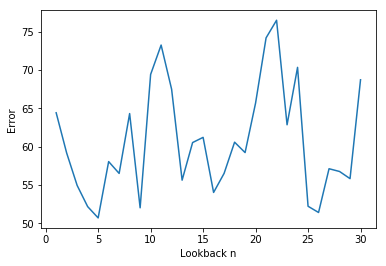

In [9]:
plt.plot(lookback_ns, errors)
plt.xlabel("Lookback n")
plt.ylabel("Error")
plt.show()